# Solution for FDA Course HW1 
Author: 林家緯 F74054122

## Part 1
Dataset: [Reviews.csv](https://drive.google.com/file/d/1JUM5y1o4hYdZIioy2gN-I22a8673S6Pt/view?usp=sharing)

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=Warning)


WIDTH = 12
HEIGHT = 8

In [2]:
dataset = pd.read_csv('Reviews.csv')
pd_data = dataset[:10000]

### 1. Top-10 Reviewer

In [3]:
id_grouped = pd_data.groupby(['UserId', 'ProfileName'])

top_10_reviewers = id_grouped['Score'].agg(['count', 'mean']).sort_values(by='count', ascending=False)[:10]
name = {'count':'Score count', 'mean':'Score mean'}
top_10_reviewers = top_10_reviewers.rename(columns=name, level=0)

top_10_reviewers

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


### 2. Plot score distribution for the user with the most number of reviews

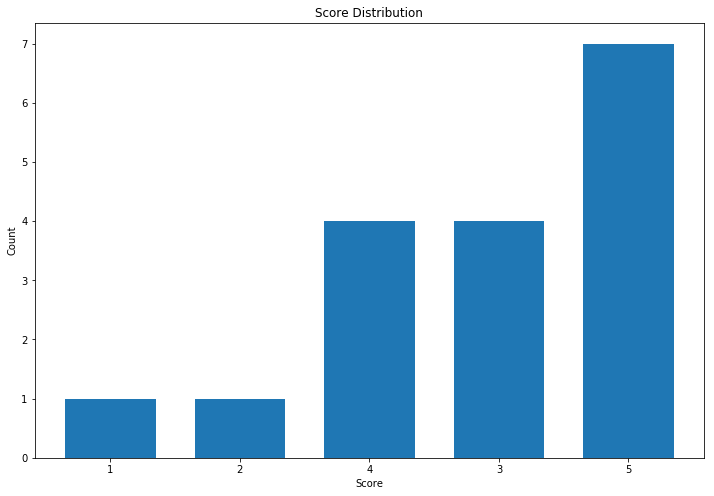

In [4]:
top_reviewer = top_10_reviewers.iloc[0].name[0]
reviews_from_top_reviewer = pd_data.loc[pd_data['UserId'] == top_reviewer]
scores = reviews_from_top_reviewer['Score']

from collections import Counter

labels, values = zip(*Counter(scores).items())

labels = labels[::-1]
values = values[::-1]

indexes = np.arange(len(labels))

plt.rcParams['figure.figsize'] = [WIDTH, HEIGHT]
plt.bar(indexes, values, 0.7)
plt.xticks(indexes, labels)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution')
plt.show()

### 3. Plot pandas Series DataFrame (Time->Date)

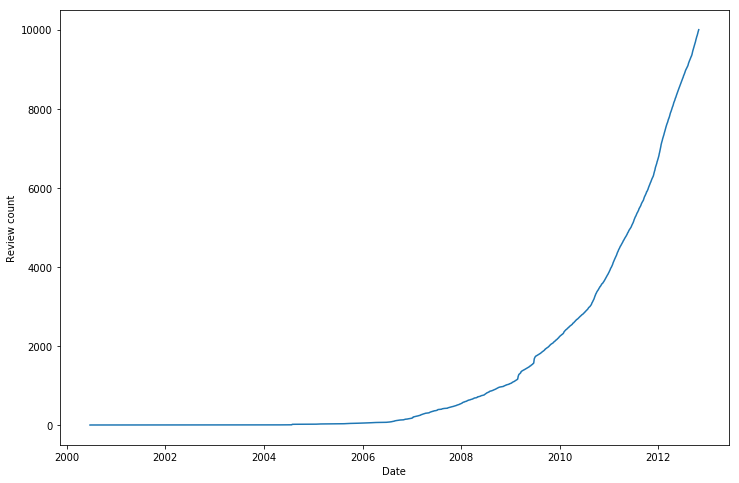

In [5]:
df = (pd.to_datetime(pd_data['Time'], unit='s')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count')
       .sort_values(by='date'))


x = df['date'].astype("M8[ms]").tolist()
plt.plot(x, df['count'].cumsum(), '-')
plt.xlabel('Date')
plt.ylabel('Review count')
plt.rcParams['figure.figsize'] = [WIDTH, HEIGHT]
plt.show()

### 4. Plot HeatMap using seaborn

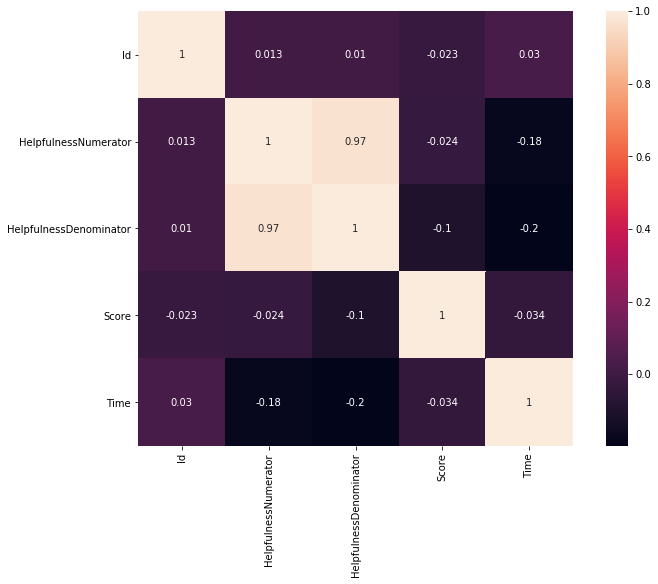

In [6]:
import seaborn as sns

selected_data = pd_data[['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']]
sns.heatmap(selected_data.corr(), annot=True, square=True)
plt.rcParams['figure.figsize'] = [WIDTH, HEIGHT]
plt.show()

### 5. Helpful percent

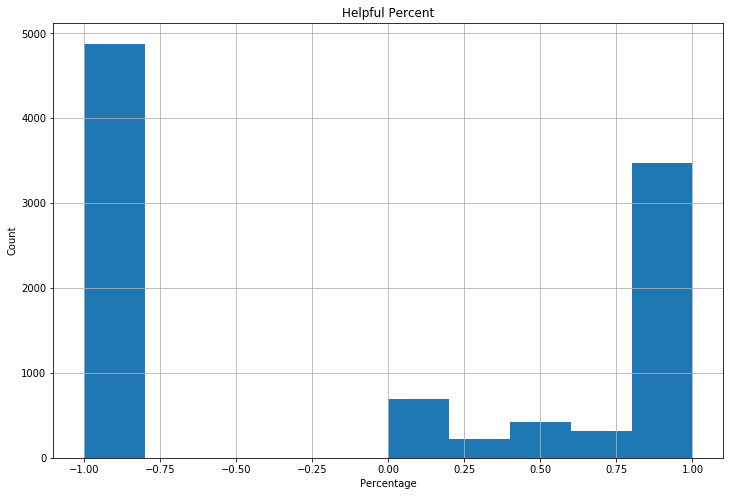

In [7]:
data = pd_data[['HelpfulnessNumerator', 'HelpfulnessDenominator']]
data['Helpful percent'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']
plt.hist(data['Helpful percent'].fillna(-1))
plt.title('Helpful Percent')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = [WIDTH, HEIGHT]
plt.grid(True)
plt.show()

## Part 2

### [Kaggle - PUBG Finish Placement Prediction](https://www.kaggle.com/c/pubg-finish-placement-prediction/)

![](https://pmcvariety.files.wordpress.com/2018/04/pubg.jpg?w=1000&h=563&crop=1)

### [Datasets](https://www.kaggle.com/c/pubg-finish-placement-prediction/data)

### Introduction

I'm going to discover some interesting outliers in the dataset

### Load Data, which is approx. 660MB

In [8]:
PUBG_data = pd.read_csv('PUBG.csv')

### Overview of the data

### Interesting features

* kills - Number of enemy players killed.
* headshotKills - Number of enemy players killed with headshots.
* walkDistance - Total distance traveled on foot measured in meters.
* longestKill - Longest distance between player and player killed at time of death. 

In [9]:
PUBG_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### Let's plot kills!

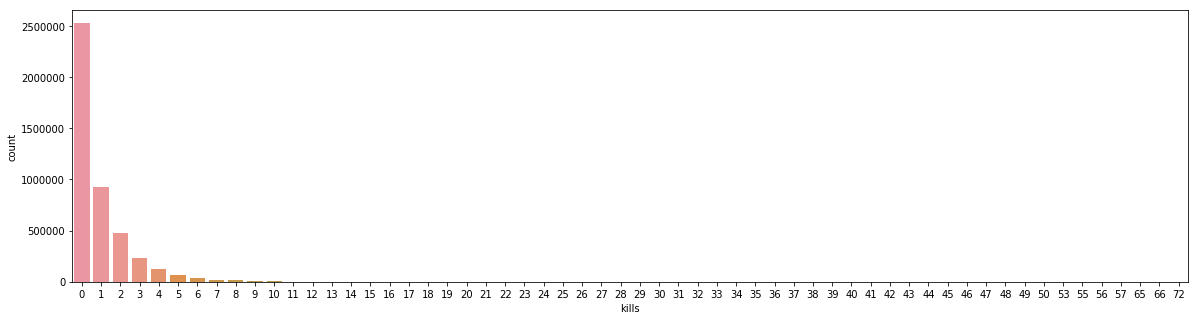

In [10]:
plt.figure(figsize=(20, 5))
sns.countplot(data=PUBG_data, x=PUBG_data['kills'])
plt.show()

### These players kill half of the players in one match?

In [11]:
PUBG_data[PUBG_data['kills'] >= 50]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,0.0,0,0.0,0,0,1036.00,60,0,1.0000
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,0.0,0,0.0,0,0,24.27,56,0,1.0000
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0.0,0,0,85.55,66,0,1.0000
797111,7f3edd982813e6,10a20932a5cf8f,cfa2775c9ef944,6,0,5406.0,0,16,14,1,...,0,0.0,0,0.0,0,0,287.50,50,1500,1.0000
1248348,80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,...,0,0.0,0,0.0,0,0,1740.00,23,0,1.0000
1454065,c47bd86daa3de6,4df3e348b910d8,3ebf1bf8bc6bae,2,2,4495.0,0,42,2,1,...,0,0.0,0,0.0,0,0,1021.00,15,1500,1.0000
1462706,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.0,0,8,4,3,...,0,954.4,0,0.0,0,0,1128.00,83,0,0.8000
1491277,1f6ceaa5140fb6,dc2fef63e14d5c,f900de1ec39fa5,15,0,5468.0,0,13,5,2,...,0,3492.0,0,0.0,0,0,1059.00,60,0,0.9000
2020831,9b5bcc3a3dd42a,bdd2cf09863501,6bf647ecee30da,2,0,4889.0,0,46,2,1,...,0,0.0,0,0.0,0,0,272.30,14,0,1.0000
2601666,436d1530e9eb00,5c974c2bb9d9f0,fe7043ee6221c8,5,0,4347.0,0,31,0,1,...,0,0.0,0,0.0,0,0,134.30,36,0,1.0000


### Let's plot headshot rate!

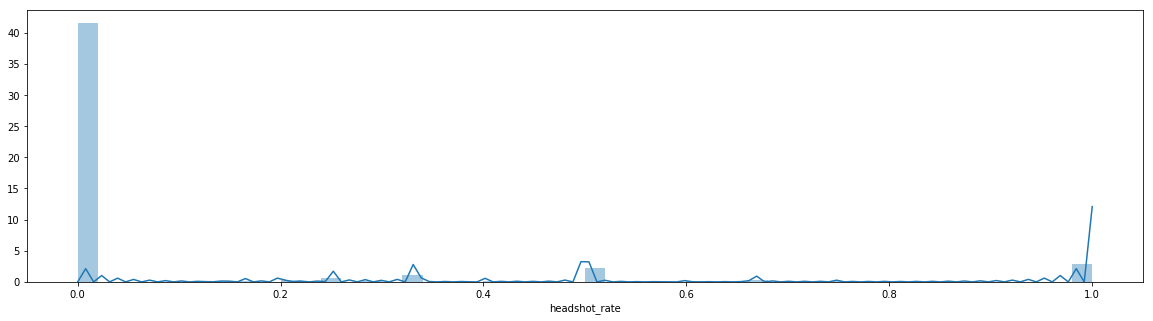

In [12]:
PUBG_data['headshot_rate'] = PUBG_data['headshotKills'] / PUBG_data['kills']
PUBG_data['headshot_rate'] = PUBG_data['headshot_rate'].fillna(0)

plt.figure(figsize=(20, 5))
sns.distplot(PUBG_data['headshot_rate'], bins=50)
plt.show()

### Looks like someone is good at shooting

In [13]:
PUBG_data[(PUBG_data['headshot_rate'] == 1) & (PUBG_data['kills'] > 10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,4720.0,0,0.0,0,0,3422.0,8,1560,1.0000,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0.0,0,0.0,0,0,2105.0,5,1587,1.0000,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,5246.0,0,0.0,0,0,2932.0,4,0,1.0000,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,2048.0,0,0.0,0,0,3915.0,5,0,1.0000,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,0.0,0,0.0,0,0,3108.0,7,1500,1.0000,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,0.0,0,140.8,0,0,2339.0,4,0,1.0000,1.0
1581850,6a5669a4c9dbed,a68b5edbdffc7b,aefc7da61179cb,0,3,1278.0,8,11,4,1,...,0.0,0,0.0,0,0,4715.0,5,0,1.0000,1.0
1753322,74e268b6d4870b,53bfcb6d8229f6,36579d5c2e52bc,0,7,1503.0,0,15,2,1,...,2018.0,0,0.0,0,0,2990.0,7,0,1.0000,1.0
2256755,d8474df8d8283a,50c8a5b906d89d,c6da477a07f4aa,0,7,1569.0,0,14,0,1,...,2785.0,0,0.0,0,0,2209.0,3,0,1.0000,1.0
2375749,48bd6fdf8719a4,d8a6b7a95481d8,360caa30aabd16,0,8,1290.0,0,14,1,1,...,561.4,0,0.0,0,0,2432.0,7,1500,0.9897,1.0


### Let's plot the distance of longest kill!

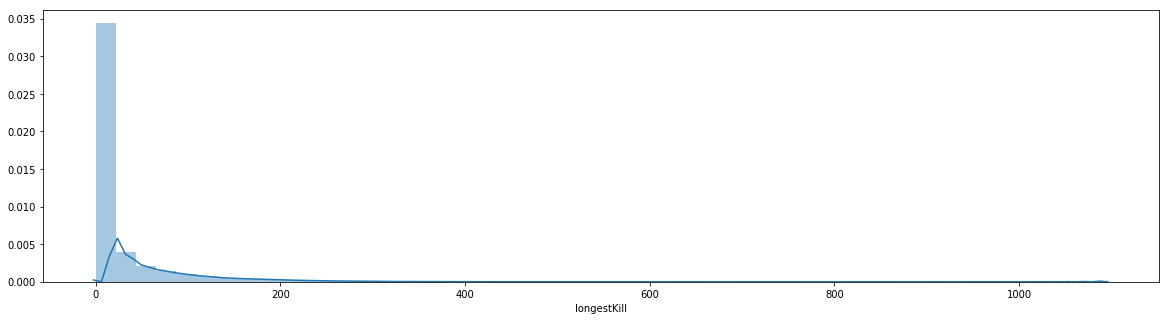

In [14]:
plt.figure(figsize=(20, 5))
sns.distplot(PUBG_data['longestKill'], bins=50)
plt.show()

### Over 1000m kills?

In [15]:
PUBG_data[PUBG_data['longestKill'] > 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.00,0,0.00,0,0,48.87,38,1500,0.5385,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1717.00,0,0.00,0,0,1264.00,26,0,1.0000,0.000000
523088,1ff9763ca30279,7fb3a83ebb050d,838cb9a3c94598,0,0,151.2,0,0,0,45,...,0.00,0,0.00,0,0,0.00,3,0,0.7143,0.000000
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,2085.00,0,0.00,0,0,1074.00,22,0,0.0000,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.00,0,0.00,0,0,569.50,18,0,0.9091,0.500000
996713,f4082eee4c45e9,4d02ce950f74fc,838cb9a3c94598,1,0,916.4,0,0,0,17,...,0.00,0,0.00,4,0,0.00,15,0,1.0000,0.000000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.00,0,0.00,0,0,832.50,9,1500,0.2857,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.00,0,0.00,0,0,2848.00,4,1500,0.9412,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.00,0,0.00,0,0,235.30,41,0,0.5000,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.00,0,0.00,0,0,133.20,43,0,0.6000,0.545455


### Let's take a look at walk distance!

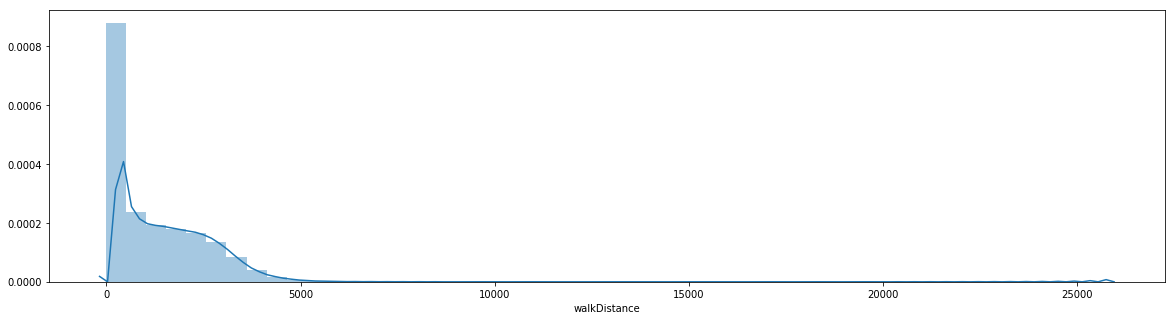

In [16]:
plt.figure(figsize=(20, 5))
sns.distplot(PUBG_data['walkDistance'], bins=50)
plt.show()

### Someone is 'walking' too hard!

In [17]:
PUBG_data[PUBG_data['walkDistance'] > 15000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,...,0.0078,0,381.90,0,0,25780.0,0,0,0.9894,0.0
1797162,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.0,0,0,0,55,...,0.0401,0,129.40,0,0,16250.0,3,0,0.6000,0.0
2238900,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.0,0,0,5,46,...,0.0111,0,389.50,0,0,15370.0,7,0,0.8125,0.0
2395009,d6d37216c02c17,56dd8821cacb32,f27850950d5597,0,3,273.3,0,0,1,11,...,1575.0000,0,59.05,0,0,15130.0,3,1583,1.0000,0.0


### Summary
These are simple outlier data analysis, there's definitely more fun facts to descover!